### Import Packages

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

### Load the dataset

In [18]:
# Set random seed for reproducibility
torch.manual_seed(42)

# Define the training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

### DataLoader

In [19]:
# Create data loaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

### AutoEncoder

In [20]:

# Define the Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
 

In [21]:
# Create an instance of the Autoencoder model
autoencoder = Autoencoder()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

### Training

In [22]:
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for data in train_loader:
        images, _ = data
        images = images.view(images.size(0), -1)

        # Forward pass
        outputs = autoencoder(images)
        loss = criterion(outputs, images)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print the loss after each epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Save the trained model
torch.save(autoencoder.state_dict(), 'autoencoder_model.pth')

Epoch [1/10], Loss: 0.0199
Epoch [2/10], Loss: 0.0150
Epoch [3/10], Loss: 0.0121
Epoch [4/10], Loss: 0.0110
Epoch [5/10], Loss: 0.0075
Epoch [6/10], Loss: 0.0091
Epoch [7/10], Loss: 0.0081
Epoch [8/10], Loss: 0.0075
Epoch [9/10], Loss: 0.0079
Epoch [10/10], Loss: 0.0061


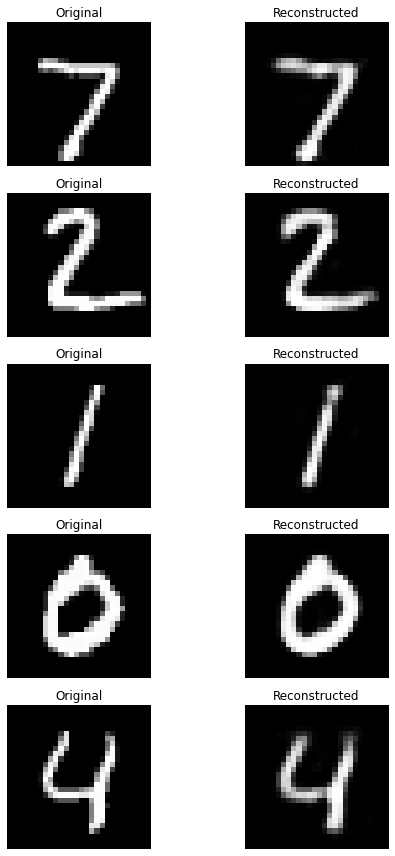

In [23]:
import matplotlib.pyplot as plt

# Evaluate the trained model on test data
with torch.no_grad():
    test_images = next(iter(test_loader))[0]
    test_images = test_images.view(test_images.size(0), -1)
    reconstructed_images = autoencoder(test_images)

# Display a few original and reconstructed images
num_images = 5
fig, axes = plt.subplots(num_images, 2, figsize=(8, 12))
for i in range(num_images):
    axes[i, 0].imshow(test_images[i].view(28, 28), cmap='gray')
    axes[i, 0].axis('off')
    axes[i, 0].set_title('Original')

    axes[i, 1].imshow(reconstructed_images[i].view(28, 28), cmap='gray')
    axes[i, 1].axis('off')
    axes[i, 1].set_title('Reconstructed')

plt.tight_layout()
plt.show()
